### 1. Part 1 - Supervised Learning

**Import important libraries**

In [1]:
# Portugal Bank Marketing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Import dataset**

In [2]:
bank = pd.read_csv(r"C:\zubeda\PGA02_Zubu\Machine Learning Models\ML Exam 1\bank.csv", sep=";")
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank.shape

(41188, 21)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Q1. What does the primary analysis of several categorical features reveal?**

**Univariate Analysis**

In [6]:
bank.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [7]:
#Distribution of jobs
bank["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [8]:
#Combine similar jobs into categories
bank['job'] = bank['job'].replace(['management', 'admin.'], 'white-collar')
bank['job'] = bank['job'].replace(['services', 'housemaid', 'technician'], 'pink-collar')
bank['job'] = bank['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [9]:
bank["job"].value_counts()

white-collar     13346
pink-collar      11772
blue-collar       9254
other             3939
entrepreneur      1456
self-employed     1421
Name: job, dtype: int64

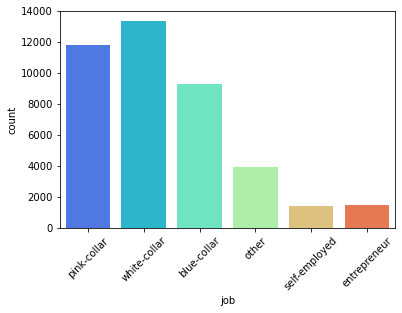

In [10]:
sns.countplot(bank.job, palette="rainbow")
plt.xticks(rotation=45)
plt.show()

We can see that there are more number of white collars people than other category of jobs.

In [11]:
#Distribution of marital status
bank["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

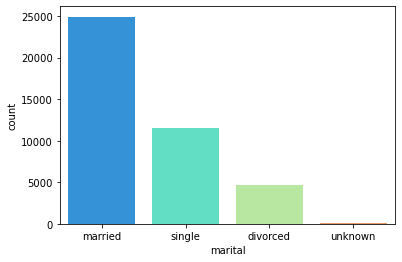

In [12]:
sns.countplot(bank.marital, palette="rainbow")
plt.show()

From the above graph, it is clearly visble that most of the people are married.

In [13]:
#Distribution of education
bank["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

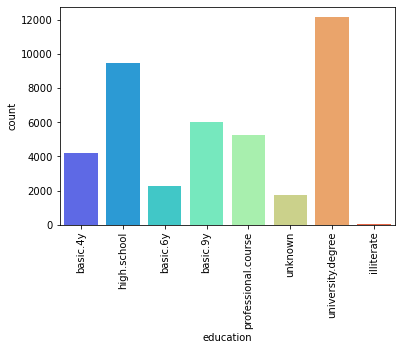

In [14]:
#Distribution of marital status
sns.countplot(bank.education, palette="rainbow")
plt.xticks(rotation="vertical")
plt.show()

From the above, we can conclude that most of the people are university degree passed out.

In [15]:
bank["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

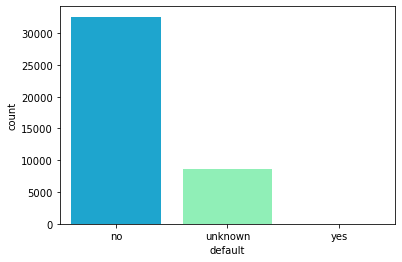

In [16]:
#Distribution of marital status
sns.countplot(bank.default, palette="rainbow")
plt.show()

It can be seen that most of the people are not credit default

In [17]:
bank["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

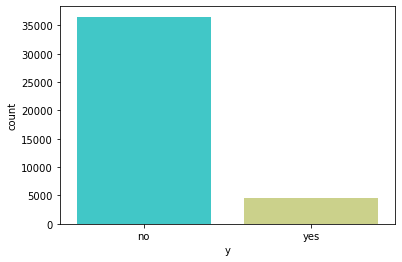

In [18]:
#Distribution of marital status
sns.countplot(bank.y, palette="rainbow")
plt.show()

From the above graph, we can see that most of the people have subscribed for term deposit

**Bivariate analysis**

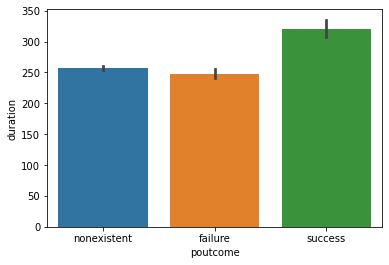

In [19]:
#Previous outcome Vs Call duration
sns.barplot(x='poutcome', y='duration', data=bank)
plt.show()

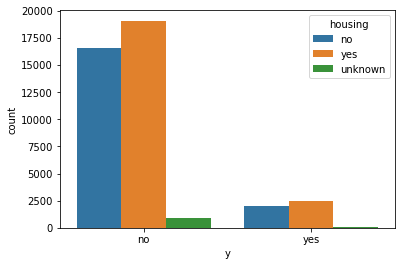

In [20]:
#bank subscription Vs housing Loan
sns.countplot(bank.y, hue=bank.housing)
plt.show()

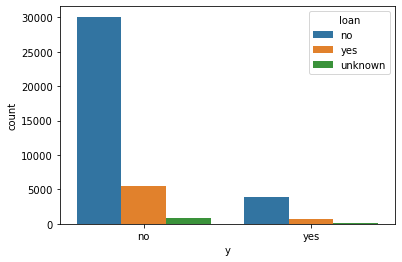

In [21]:
#bank subscription Vs personal Loan
sns.countplot(bank.y, hue=bank.loan)
plt.show()

**Q2. Perform the following Exploratory Data Analysis tasks:**

a. Missing Value Analysis

In [22]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

b. Label Encoding wherever required

In [23]:
cols = ["duration", "contact", "month", "day_of_week"]
bank.drop(cols, axis=1, inplace=True)

In [24]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [25]:
bank['y'] = bank['y'].map({'yes':1, 'no':0})

In [26]:
bank.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,pink-collar,married,basic.4y,no,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,pink-collar,married,high.school,unknown,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,pink-collar,married,high.school,no,yes,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,white-collar,married,basic.6y,no,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,pink-collar,married,high.school,no,no,yes,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [27]:
cat = bank.describe(include="object").columns
cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'poutcome'],
      dtype='object')

In [28]:
#Convert categorical variables to dummies
bank_with_dummies = pd.get_dummies(data=bank, columns=cat, prefix=cat, drop_first=True)
bank_with_dummies.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,0,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,0,0,1,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,0,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,0,0,0,0,1,1,0


In [29]:
bank_with_dummies.shape

(41188, 33)

**c. Selecting important features based on Random Forest**

In [30]:
from sklearn.model_selection import train_test_split

X = bank_with_dummies.drop("y", axis=1)
y = bank_with_dummies["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=125)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30891, 32)
(10297, 32)
(30891,)
(10297,)


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10000, random_state=100, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=100)

In [32]:
feat_labels = X.columns.values

feature_importance = []
for feature in zip(feat_labels, rf.feature_importances_):
    feature_importance.append(feature)

feature_importance

[('age', 0.21489220686368896),
 ('campaign', 0.0964108449519458),
 ('pdays', 0.039368075357720196),
 ('previous', 0.01758468259002581),
 ('emp.var.rate', 0.0251820864097231),
 ('cons.price.idx', 0.031412412831088025),
 ('cons.conf.idx', 0.03679350861113286),
 ('euribor3m', 0.1883460867253858),
 ('nr.employed', 0.05619453892702956),
 ('job_entrepreneur', 0.005665416897793785),
 ('job_other', 0.013475062173081856),
 ('job_pink-collar', 0.018162750233619854),
 ('job_self-employed', 0.006064059645380509),
 ('job_white-collar', 0.01834757216826921),
 ('marital_married', 0.019627181477108853),
 ('marital_single', 0.01616538251629885),
 ('marital_unknown', 0.0011140280621129764),
 ('education_basic.6y', 0.007506241106063334),
 ('education_basic.9y', 0.011776846276497636),
 ('education_high.school', 0.01716104960012861),
 ('education_illiterate', 0.0002873975223658756),
 ('education_professional.course', 0.01241200786109607),
 ('education_university.degree', 0.0163271192346955),
 ('education_u

In [33]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rf, threshold=0.02)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=100),
                threshold=0.02)

In [34]:
selected = []

for feature_list_index in sfm.get_support(indices=True):
    selected.append(feat_labels[feature_list_index])

selected

['age',
 'campaign',
 'pdays',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'housing_yes',
 'loan_yes',
 'poutcome_success']

In [35]:
bank_selected = bank_with_dummies[selected]
bank_selected.head()

,age,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,housing_yes,loan_yes,poutcome_success
0,56,1,999,1.1,93.994,-36.4,4.857,5191.0,0,0,0
1,57,1,999,1.1,93.994,-36.4,4.857,5191.0,0,0,0
2,37,1,999,1.1,93.994,-36.4,4.857,5191.0,1,0,0
3,40,1,999,1.1,93.994,-36.4,4.857,5191.0,0,0,0
4,56,1,999,1.1,93.994,-36.4,4.857,5191.0,0,1,0


In [36]:
bank_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41188 non-null  int64  
 1   campaign          41188 non-null  int64  
 2   pdays             41188 non-null  int64  
 3   emp.var.rate      41188 non-null  float64
 4   cons.price.idx    41188 non-null  float64
 5   cons.conf.idx     41188 non-null  float64
 6   euribor3m         41188 non-null  float64
 7   nr.employed       41188 non-null  float64
 8   housing_yes       41188 non-null  uint8  
 9   loan_yes          41188 non-null  uint8  
 10  poutcome_success  41188 non-null  uint8  
dtypes: float64(5), int64(3), uint8(3)
memory usage: 2.6 MB


d. Handling unbalanced data using SMOTE

In [37]:
X = bank_selected
y = bank_with_dummies["y"]

In [38]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
Counter(y)

Counter({0: 36548, 1: 36548})

e. Standardize the data using the anyone of the scalers provided by sklearn

In [39]:
catcols = ["housing_yes", "loan_yes", "poutcome_success"]
X[catcols] = X[catcols].astype("object")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73096 entries, 0 to 73095
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               73096 non-null  int64  
 1   campaign          73096 non-null  int64  
 2   pdays             73096 non-null  int64  
 3   emp.var.rate      73096 non-null  float64
 4   cons.price.idx    73096 non-null  float64
 5   cons.conf.idx     73096 non-null  float64
 6   euribor3m         73096 non-null  float64
 7   nr.employed       73096 non-null  float64
 8   housing_yes       73096 non-null  object 
 9   loan_yes          73096 non-null  object 
 10  poutcome_success  73096 non-null  object 
dtypes: float64(5), int64(3), object(3)
memory usage: 6.1+ MB


In [40]:
numcols = X.describe().columns
data_num = X[numcols]
data_num

,age,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,1.1,93.994000,-36.400000,4.857000,5191.0
1,57,1,999,1.1,93.994000,-36.400000,4.857000,5191.0
2,37,1,999,1.1,93.994000,-36.400000,4.857000,5191.0
3,40,1,999,1.1,93.994000,-36.400000,4.857000,5191.0
4,56,1,999,1.1,93.994000,-36.400000,4.857000,5191.0
...,...,...,...,...,...,...,...,...
73091,32,2,999,-1.8,92.893000,-46.200000,1.266000,5099.1
73092,27,1,999,-3.4,92.534207,-29.972452,0.745935,5017.5
73093,32,2,12,-1.7,94.121249,-40.007027,0.805921,4991.6
73094,51,1,999,-3.0,92.713000,-33.000000,0.709073,5023.5


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data_num)

data_num[numcols] = scaler.fit_transform(data_num)
print(data_num.shape)

(73096, 8)


In [42]:
data_standardised = pd.concat([data_num, X[catcols]], axis=1)
data_standardised

,age,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,housing_yes,loan_yes,poutcome_success
0,0.481481,0.000000,1.000000,0.937500,0.698753,0.602510,0.957379,0.859735,0,0,0
1,0.493827,0.000000,1.000000,0.937500,0.698753,0.602510,0.957379,0.859735,0,0,0
2,0.246914,0.000000,1.000000,0.937500,0.698753,0.602510,0.957379,0.859735,1,0,0
3,0.283951,0.000000,1.000000,0.937500,0.698753,0.602510,0.957379,0.859735,0,0,0
4,0.481481,0.000000,1.000000,0.937500,0.698753,0.602510,0.957379,0.859735,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
73091,0.185185,0.018182,1.000000,0.333333,0.269680,0.192469,0.143278,0.512287,0,0,0
73092,0.123457,0.000000,1.000000,0.000000,0.129855,0.871446,0.025376,0.203781,0,0,0
73093,0.185185,0.018182,0.012012,0.354167,0.748343,0.451589,0.038976,0.105860,1,0,1
73094,0.419753,0.000000,1.000000,0.083333,0.199532,0.744770,0.017019,0.226465,0,0,0


**Q3. Build the following Supervised Learning models:**

In [43]:
X = data_standardised
y = y.astype('int64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(51167, 11)
(21929, 11)
(51167,)
(21929,)


Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score
result = classification_report(y_test, y_pred_log)

print(result)

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10975
           1       0.75      0.69      0.72     10954

    accuracy                           0.73     21929
   macro avg       0.73      0.73      0.73     21929
weighted avg       0.73      0.73      0.73     21929



In [63]:
from sklearn import metrics
cols = ['Model', 'Precision Score', 'Recall Score', 'Accuracy Score', 'f1-score']

#creating an empty dataframe of the columns
result_tabulation = pd.DataFrame(columns=cols)

#compiling the required information
Logistic = pd.Series({
    'Model': 'Logistic Regression',
    'Precision Score': precision_score(y_test, y_pred_log),
    'Recall Score': recall_score(y_test, y_pred_log),
    'Accuracy Score': accuracy_score(y_test, y_pred_log),
    'f1-score': f1_score(y_test, y_pred_log)
})

result_tabulation = result_tabulation.append(Logistic, ignore_index=True)

result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.750718,0.691985,0.73136,0.720156


KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn.fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)

In [48]:
result = classification_report(y_test, y_pred_KNN)

print(result)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81     10975
           1       0.80      0.83      0.82     10954

    accuracy                           0.81     21929
   macro avg       0.81      0.81      0.81     21929
weighted avg       0.81      0.81      0.81     21929



In [64]:
KNN = pd.Series({
    'Model': 'KNN',
    'Precision Score': precision_score(y_test, y_pred_KNN),
    'Recall Score': recall_score(y_test, y_pred_KNN),
    'Accuracy Score': accuracy_score(y_test, y_pred_KNN),
    'f1-score': f1_score(y_test, y_pred_KNN)
})

result_tabulation = result_tabulation.append(KNN, ignore_index=True)

result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.750718,0.691985,0.731360,0.720156
1,KNN,0.799825,0.834581,0.813033,0.816833


SVM

In [53]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1)
svm.fit(X_train, y_train)

SVC(random_state=1)

In [54]:
y_pred_svm = svm.predict(X_test)

result = classification_report(y_test, y_pred_svm)

print(result)

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10975
           1       0.76      0.69      0.72     10954

    accuracy                           0.74     21929
   macro avg       0.74      0.74      0.73     21929
weighted avg       0.74      0.74      0.73     21929



In [65]:
SVM = pd.Series({
    'Model': 'SVM',
    'Precision Score': precision_score(y_test, y_pred_svm),
    'Recall Score': recall_score(y_test, y_pred_svm),
    'Accuracy Score': accuracy_score(y_test, y_pred_svm),
    'f1-score': f1_score(y_test, y_pred_svm)
})

result_tabulation = result_tabulation.append(SVM, ignore_index=True)

result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.750718,0.691985,0.731360,0.720156
1,KNN,0.799825,0.834581,0.813033,0.816833
2,SVM,0.755664,0.694267,0.735145,0.723665


Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [66]:
y_pred_gnb = gnb.predict(X_test)

result = classification_report(y_test, y_pred_gnb)

print(result)

              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10975
           1       0.76      0.68      0.71     10954

    accuracy                           0.73     21929
   macro avg       0.73      0.73      0.73     21929
weighted avg       0.73      0.73      0.73     21929



In [67]:
GNB = pd.Series({
    'Model': 'GNB',
    'Precision Score': precision_score(y_test, y_pred_gnb),
    'Recall Score': recall_score(y_test, y_pred_gnb),
    'Accuracy Score': accuracy_score(y_test, y_pred_gnb),
    'f1-score': f1_score(y_test, y_pred_gnb)
})

result_tabulation = result_tabulation.append(GNB, ignore_index=True)

result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.750718,0.691985,0.731360,0.720156
1,KNN,0.799825,0.834581,0.813033,0.816833
2,SVM,0.755664,0.694267,0.735145,0.723665
3,GNB,0.757942,0.675187,0.730038,0.714175


AdaBoost

In [68]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=10)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=10)

In [69]:
y_pred_adb = gnb.predict(X_test)

result = classification_report(y_test, y_pred_adb)

print(result)

              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10975
           1       0.76      0.68      0.71     10954

    accuracy                           0.73     21929
   macro avg       0.73      0.73      0.73     21929
weighted avg       0.73      0.73      0.73     21929



In [70]:
AdaBoost = pd.Series({
    'Model': 'AdaBoost',
    'Precision Score': precision_score(y_test, y_pred_adb),
    'Recall Score': recall_score(y_test, y_pred_adb),
    'Accuracy Score': accuracy_score(y_test, y_pred_adb),
    'f1-score': f1_score(y_test, y_pred_adb)
})

result_tabulation = result_tabulation.append(AdaBoost, ignore_index=True)

result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.750718,0.691985,0.731360,0.720156
1,KNN,0.799825,0.834581,0.813033,0.816833
2,SVM,0.755664,0.694267,0.735145,0.723665
3,GNB,0.757942,0.675187,0.730038,0.714175
4,AdaBoost,0.757942,0.675187,0.730038,0.714175


**Q4.Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or not**

In [71]:
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.750718,0.691985,0.731360,0.720156
1,KNN,0.799825,0.834581,0.813033,0.816833
2,SVM,0.755664,0.694267,0.735145,0.723665
3,GNB,0.757942,0.675187,0.730038,0.714175
4,AdaBoost,0.757942,0.675187,0.730038,0.714175


From the above tabulation, we can conclude that **KNN model** has the highes Precision, Recall, Accuracy anf f1 score as compared to **SVM, Naive Bayes, Logistic Regression and AdaBoost models**.

### 2. Part 2 - Time Series

In [72]:
#Import dataset
market = pd.read_csv(r"C:\zubeda\PGA02_Zubu\Machine Learning Models\ML Exam 1\MonthWiseMarketArrivals_Clean.csv")
market.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [73]:
market.shape

(10227, 10)

In [74]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


**Q1. Get the modal price of onion for each month for the Mumbai market (Hint: set monthly date as index and drop redundant columns)**

In [75]:
market_data = market.copy(deep=True)
market_data['date'] = market_data['date'].apply(lambda x: pd.to_datetime(x))
market_data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [76]:
cols = ['month', 'year', 'quantity', 'priceMin', 'priceMax', "state", "city"]
market_data = market_data.drop(cols, axis=1)
market_data = market_data.sort_values('date')
market_data.head()

,market,priceMod,date
5399,LASALGAON(MS),226,1996-01-01
5420,LASALGAON(MS),186,1996-02-01
5441,LASALGAON(MS),243,1996-03-01
5461,LASALGAON(MS),254,1996-04-01
5481,LASALGAON(MS),269,1996-05-01


In [77]:
market_data.set_index('date', inplace=True)
market_data.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2016-02-01', '2016-02-01', '2016-02-01', '2016-02-01',
               '2016-02-01', '2016-02-01', '2016-02-01', '2016-02-01',
               '2016-02-01', '2016-02-01'],
              dtype='datetime64[ns]', name='date', length=10227, freq=None)

In [78]:
market_data.drop("market", axis=1, inplace=True)
market_data.head()

,priceMod
date,
1996-01-01,226
1996-02-01,186
1996-03-01,243
1996-04-01,254
1996-05-01,269


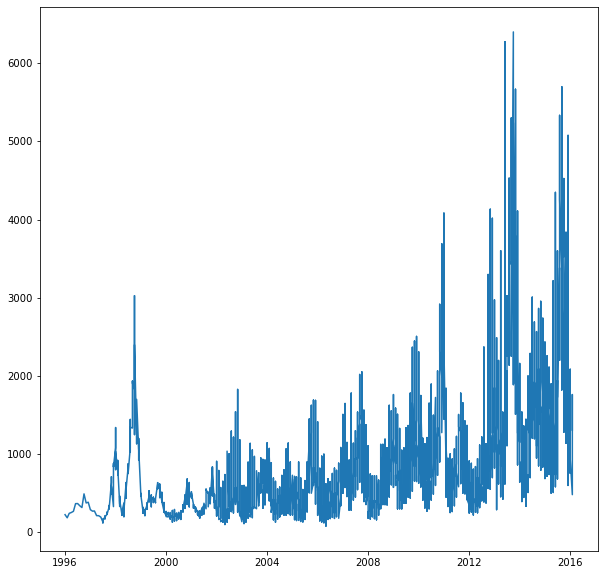

In [79]:
fig = plt.figure(figsize=(10, 10))
plt.plot(market_data)
plt.show()

In [80]:
#Resampling
data = market_data["priceMod"].resample('MS').mean()
data.head()

date
1996-01-01    226.0
1996-02-01    186.0
1996-03-01    243.0
1996-04-01    254.0
1996-05-01    269.0
Freq: MS, Name: priceMod, dtype: float64

**Q2. Build time series model and check the performance of the model using RMSE**

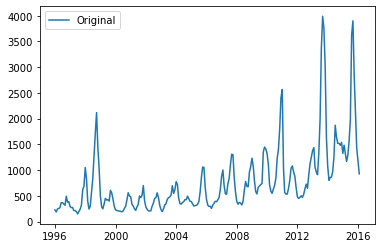

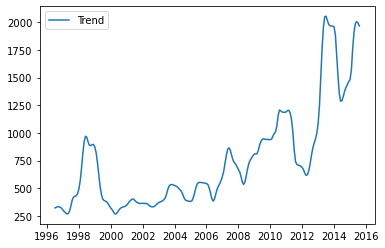

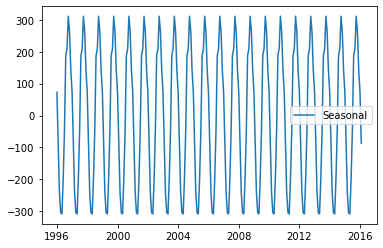

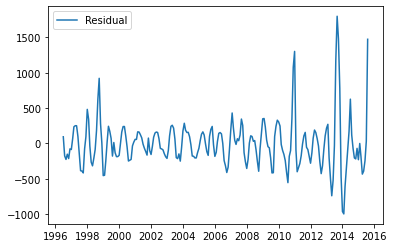

In [81]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

plt.plot(data, label='Original')
plt.legend(loc='best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label='Trend')
plt.legend(loc='best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label='Residual')
plt.legend(loc='best')

In [82]:
#Check Stationarity
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(data, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic             -1.552957
p-value                     0.507171
#Lags Used                 13.000000
Number of Observations    228.000000
Critical Value (1%)        -3.459361
Critical Value (5%)        -2.874302
Critical Value (10%)       -2.573571
dtype: float64


Test Statistic > Critical value, Accept H0, Non-Stationary

In [83]:
#Differencing to make it stationary
data = data - data.shift(1)

<AxesSubplot:xlabel='date'>

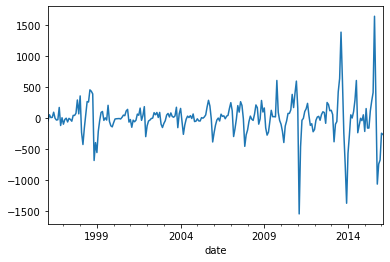

In [84]:
data.dropna(inplace=True)
data.plot()

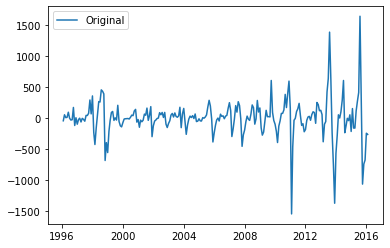

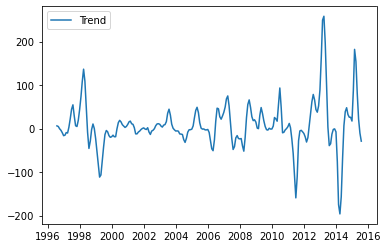

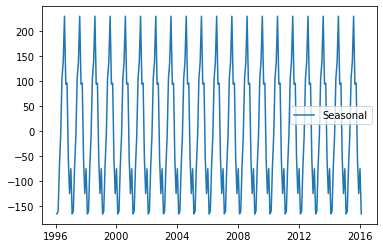

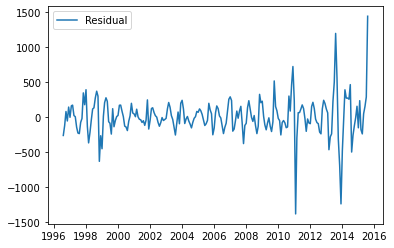

In [85]:
#Decomposition
decomposition = seasonal_decompose(data)

plt.plot(data, label='Original')
plt.legend(loc='best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label='Trend')
plt.legend(loc='best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label='Residual')
plt.legend(loc='best')

In [86]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [87]:
#Systematic splitting
size = int(len(data) * 0.90)
train, test = data[0:size], data[size:len(data)]

In [88]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

order_list = []
param_seasonal_list = []
aic_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA {} x {} - AIC: {}'.format(param, param_seasonal, results.aic))
            order_list.append(param)
            param_seasonal_list.append(param_seasonal)
            aic_list.append(results.aic)
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12) - AIC: 3003.298951632587
ARIMA (0, 0, 0) x (0, 0, 1, 12) - AIC: 2848.4672461873793
ARIMA (0, 0, 0) x (0, 1, 0, 12) - AIC: 2939.855789893467
ARIMA (0, 0, 0) x (0, 1, 1, 12) - AIC: 2677.127333268878
ARIMA (0, 0, 0) x (1, 0, 0, 12) - AIC: 2861.4886002950943
ARIMA (0, 0, 0) x (1, 0, 1, 12) - AIC: 2844.8845409568394
ARIMA (0, 0, 0) x (1, 1, 0, 12) - AIC: 2720.1589539180013
ARIMA (0, 0, 0) x (1, 1, 1, 12) - AIC: 2673.2903268387504
ARIMA (0, 0, 1) x (0, 0, 0, 12) - AIC: 2930.845734828773
ARIMA (0, 0, 1) x (0, 0, 1, 12) - AIC: 2777.708215821188
ARIMA (0, 0, 1) x (0, 1, 0, 12) - AIC: 2889.5870944171443
ARIMA (0, 0, 1) x (0, 1, 1, 12) - AIC: 2613.469838782241
ARIMA (0, 0, 1) x (1, 0, 0, 12) - AIC: 2802.758166851553
ARIMA (0, 0, 1) x (1, 0, 1, 12) - AIC: 2773.607663369125
ARIMA (0, 0, 1) x (1, 1, 0, 12) - AIC: 2682.397418376429
ARIMA (0, 0, 1) x (1, 1, 1, 12) - AIC: 2609.345249745046
ARIMA (0, 1, 0) x (0, 0, 0, 12) - AIC: 2985.8224578472796
ARIMA (0, 1, 0) x (0, 0,

In [89]:
minval = aic_list.index(min(aic_list))
print(min(aic_list))
order = order_list[minval]
seasonal_order = param_seasonal_list[minval]

2607.3125210552275


In [90]:
mod = sm.tsa.statespace.SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2486      0.089      2.796      0.005       0.074       0.423
ma.L1          0.3123      0.110      2.843      0.004       0.097       0.528
ar.S.L12      -0.1944      0.143     -1.362      0.173      -0.474       0.085
ma.S.L12      -1.0010      7.321     -0.137      0.891     -15.349      13.347
sigma2      4.396e+04   3.24e+05      0.135      0.892   -5.92e+05     6.8e+05


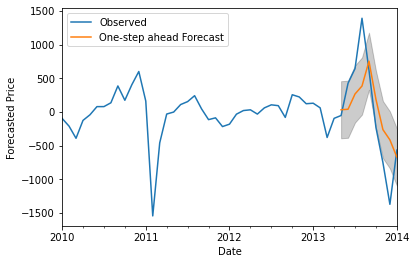

In [91]:
#Validating Forecasts
pred = results.get_prediction(start=pd.to_datetime('2013-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = train['2010':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Forecasted Price')
plt.legend()
plt.show()

In [92]:
y_forecasted = pred.predicted_mean
y_truth = train['2011-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
mse = round(mse, 2)
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error :{}'.format(mse))
print('The Root Mean Squared Error :{}'.format(rmse))

The Mean Squared Error :295881.48
The Root Mean Squared Error :543.95


**Q3. Plot ACF and PACF plots**

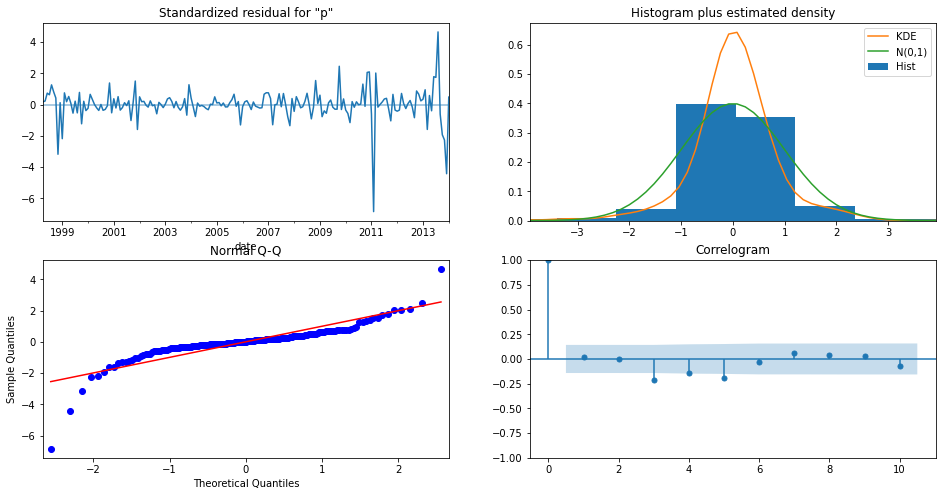

In [93]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

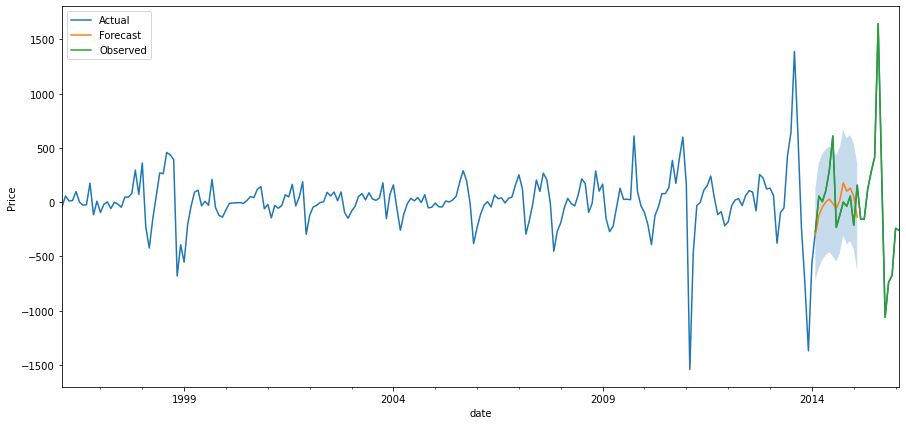

In [94]:
#Vizualizing Forecasts
pred_for = results.get_forecast(steps=13)
pred_ci = pred_for.conf_int()
ax = data.plot(label='Actual')
pred_for.predicted_mean.plot(ax=ax, label='Forecast', figsize=(15, 7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
test.plot(label='Observed')
plt.legend(loc='best')
plt.show()

In [95]:
actual = test
predicted = pred_ci['upper priceMod']
mse = ((actual - predicted) ** 2).mean()
mse = round(mse, 2)
rmse = round(np.sqrt(mse), 2)
print('The Mean Squared Error :{}'.format(mse))
print('The Root Mean Squared Error :{}'.format(rmse))

The Mean Squared Error :249922.14
The Root Mean Squared Error :499.92


**Q4. Exponential smoothing using Holt-Winter’s technique and Forecast onion price for Mumbai market**

<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing - Additive Trend'}, xlabel='date'>

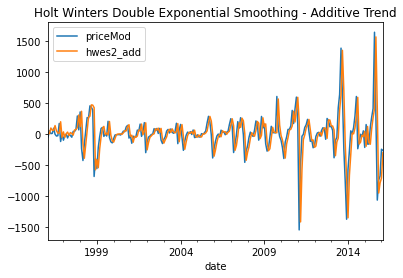

In [106]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

market_data1 = pd.DataFrame(data).copy()
market_data1["hwes2_add"] = ExponentialSmoothing(market_data1["priceMod"], trend='add').fit().fittedvalues
market_data1[["priceMod", "hwes2_add"]].plot(title='Holt Winters Double Exponential Smoothing - Additive Trend')